In [168]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc


In [169]:
# Loading the provided dataset
data = pd.read_csv("diabetes.csv")


In [170]:
# Preprocessing the dataset
# We have null values in the predictor variables, so we are replacing those with the mean of the corresponding data


diabetes_df_copy = data.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].mean(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].mean(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].mean(), inplace = True)
print(diabetes_df_copy.isnull().sum())

# Save the cleaned dataset

diabetes_df_copy.to_csv('diabetes_processed.csv',index=False)
data = pd.read_csv('diabetes_processed.csv')



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


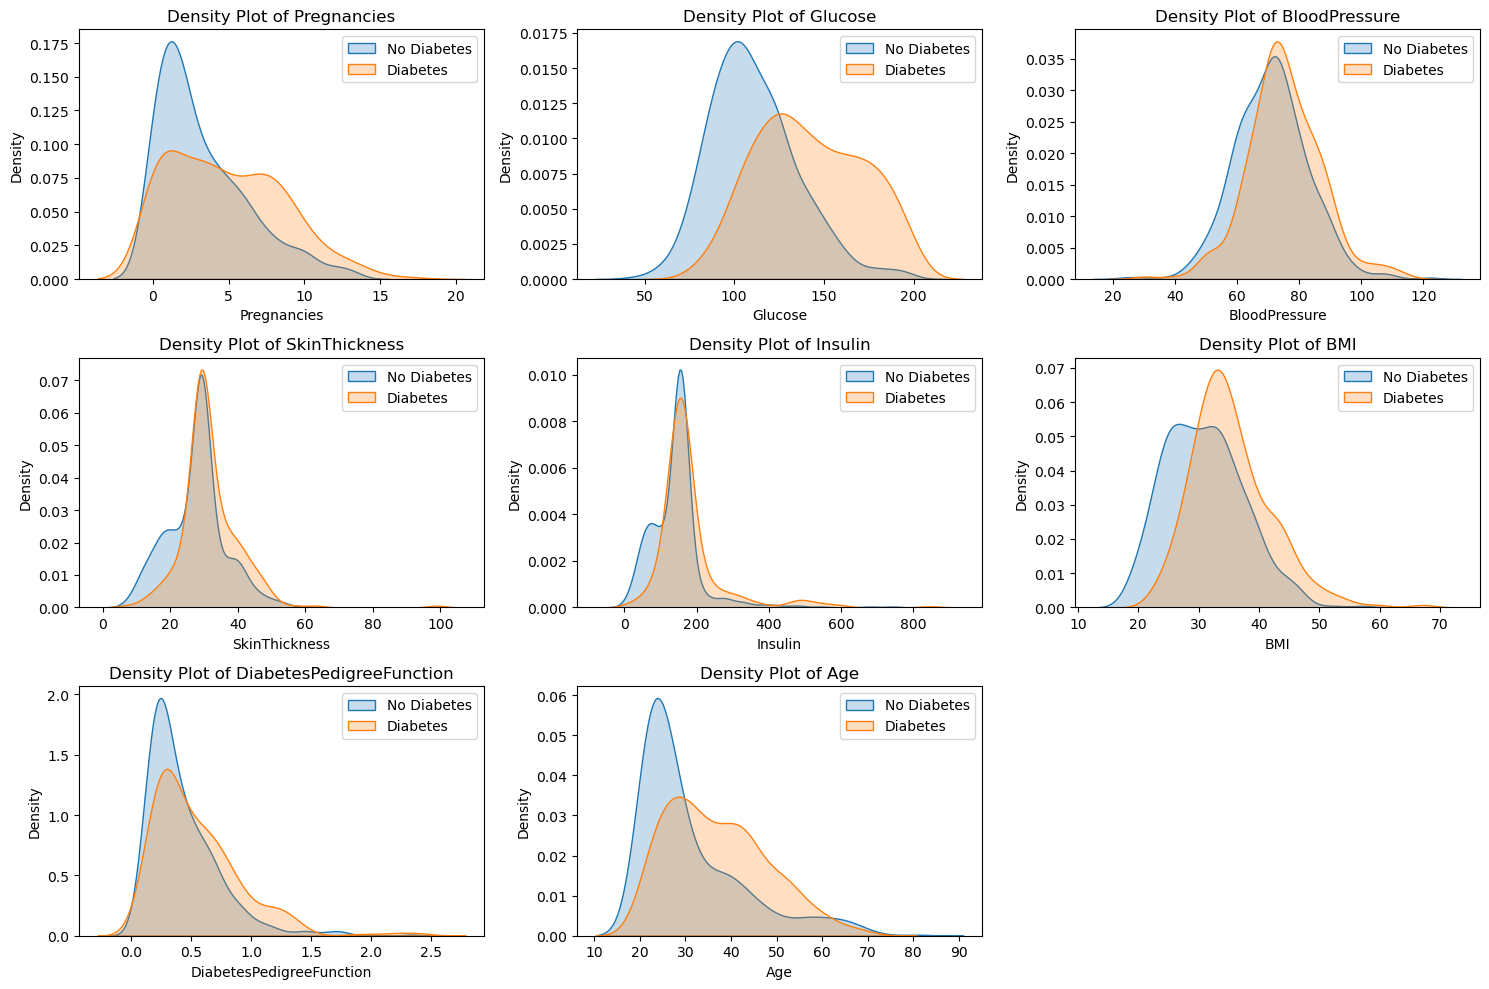

In [171]:
# Plot density graphs for each variable with the outcome
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(data[data['Outcome'] == 0][col], label='No Diabetes', shade=True)
    sns.kdeplot(data[data['Outcome'] == 1][col], label='Diabetes', shade=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()

In [172]:
# Splitting data into predictor variables (X) and outcome (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [173]:
# Split data into training and testing sets
# Here we are using a 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# Using a standard scaler to standardize the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [175]:
# Perceptron Algorithm 

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=200):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        self.bias = 0
        self.errors = []

        for _ in range(self.epochs):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.bias += update
                error += int(update != 0.0)
            self.errors.append(error)

    def predict(self, X):
        return np.where(np.dot(X, self.weights[1:]) + self.bias > 0, 1, 0)

In [176]:
# Train the Perceptron model
perceptron = Perceptron(learning_rate=0.1, epochs=200)
perceptron.fit(X_train, y_train)

In [177]:
# Evaluate the model
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model is: {accuracy}")

Accuracy of the model is: 0.7857142857142857


Confusion Matrix:
[[80 19]
 [14 41]]


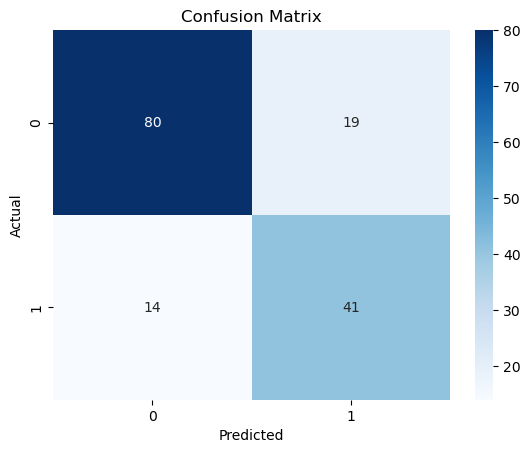

In [178]:
# Plotting the heatmap of the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

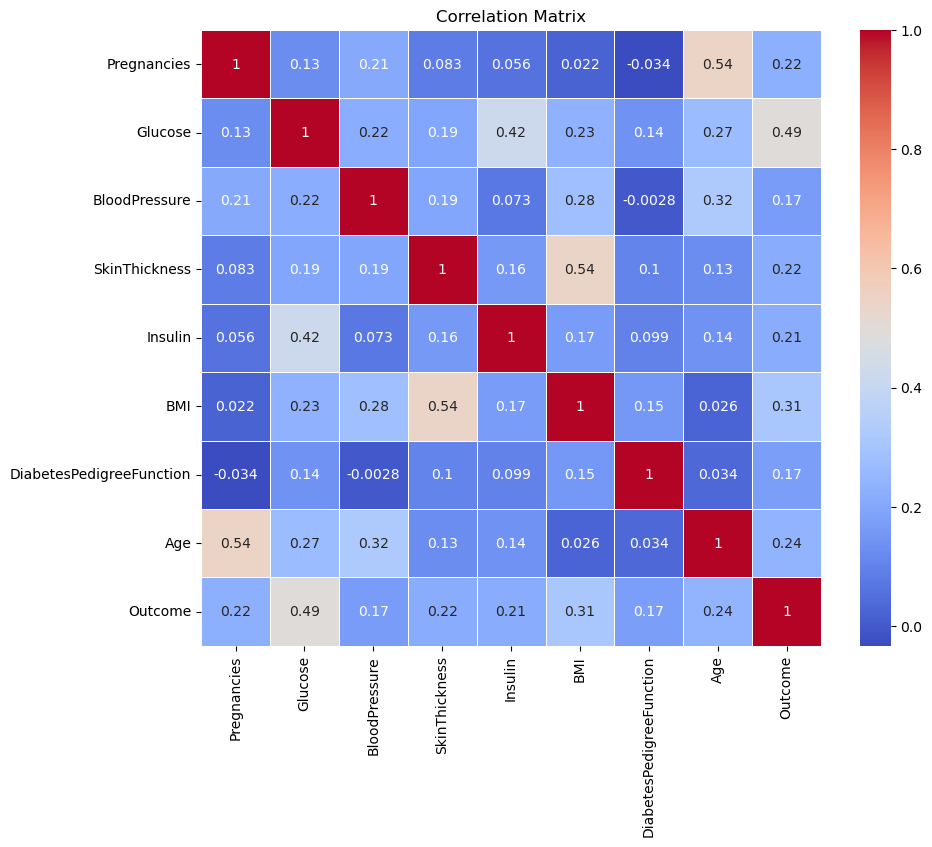

In [179]:
# Calculate and plot the heatmap of the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

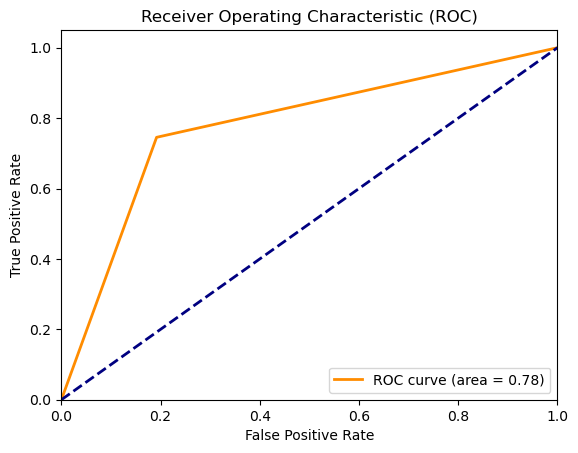

In [180]:
# Calculate and plot the ROC curve
y_score = perceptron.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

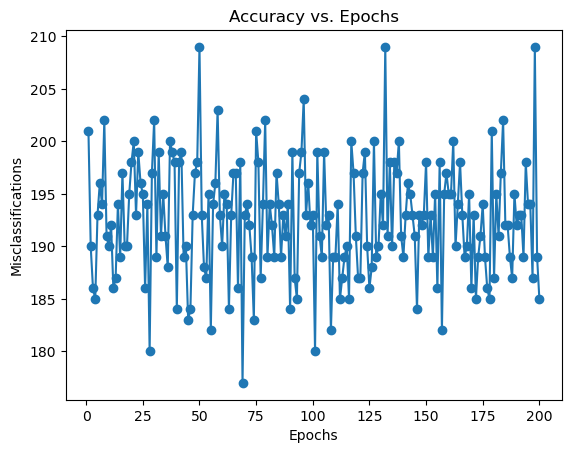

In [181]:
# Accuracy vs. Epochs
plt.plot(range(1, perceptron.epochs + 1), perceptron.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Misclassifications')
plt.title('Accuracy vs. Epochs')
plt.show()

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# Load the dataset
data = pd.read_csv("diabetes.csv")

# Split data into predictors (X) and outcome (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'max_iter': [50, 100, 200, 300, 500],
    'penalty': ['l1', 'l2'],
}

# Initialize the SGDClassifier (Perceptron-like) model
perceptron = SGDClassifier(loss='perceptron', eta0=1, learning_rate='constant', random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=perceptron, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a Perceptron-like model with the best hyperparameters
best_perceptron = SGDClassifier(loss='perceptron', eta0=1, learning_rate='constant', random_state=42, **best_params)
best_perceptron.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the evaluation results
print(f"Best Model Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)



Best Hyperparameters: {'alpha': 0.01, 'max_iter': 50, 'penalty': 'l1'}
Best Model Accuracy: 0.6233766233766234
Confusion Matrix:
[[80 19]
 [39 16]]
